# Phase 1 Review

<u><h3>Today we will be reviewing the following topics:</h3></u>
1. **SQL** 📚
2. **APIs** 📡
3. **Pandas** 🐼

# Tasks

**For this review,** please deliver the following: 

1. A dataframe containing all stock prices for 2017. 
    - Please report if any columns have null values.
    - Drop any null values from this dataframe. 

2. A plot showing how many observations in the data occur on a US public holiday. 
    - Please print the names of the public holidays that are found within the dataset.

3. A statement clarifying whether or not the `BDX` stock rose or fell on Veterans day of 2017. 
   - Please state what the opening and closing price for the stock was on Veterans day, and by how much it changed.


4. A subplot containing two graphs.
    - Plot 1: The top ten stock price *declines* on veterans day of 2017
    - Plot 2: The top ten stock price *increases* on veterans day of 2017
> Please ensure every plot has a contextualizing title

### How will you do this?

You have been given a database called `stocks.db` within the [data/](data/) folder of this repo. 
- This database contains the opening and closing prices for the S&P 500 from 2013-2018.

For data on public holidays, you are to use <u>The Public Holidays API</u> which provides public holiday information for approximately 90 countries. 

The documentation for this API can be found [here](https://date.nager.at/swagger/index.html)

***By combining data from these two sources, you will have the data required to complete the above tasks.***

<center><h3>DATABASE SCHEMA</h3></center>

![schema](db_schema.png)

# Please complete the above tasks below.
>Sections have been provided to offer some guidance and structure as you work through this problem.

# Import Libraries

<img src="https://www.dol.gov/sites/dolgov/files/OASAM/images/oasam-wirtz-library_500x345.png" width=300 height=300>

In [ ]:
# Your work goes here
# Feel free to add more cells!

In [ ]:
# __SOLUTION__
# SQL Connection and Querying
import sqlite3

# API Connection
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Data Collection

## Query Database

<img src="https://www.computerhope.com/jargon/d/database.jpg" width=300 height=300>

In [ ]:
# Your work goes here
# Feel free to add more cells!

In [ ]:
# __SOLUTION__
conn = sqlite3.connect('data/stocks.db')
stocks_2017 = pd.read_sql('''
              SELECT open,
                     close,
                     date,
                     name
              FROM price
              JOIN date
              ON price.date_id = date.id
              JOIN company
              ON price.company_id = company.id
              WHERE date BETWEEN date('2017-01-01') and date('2018-01-01')''', conn)

## Public Holiday API

<img src="https://www.cityofnewportrichey.org/wp-content/uploads/2018/04/bank-holidays.jpg" width=500 height=500>

In [ ]:
# Your work goes here
# Feel free to add more cells!

In [109]:
# __SOLUTION__
us_holidays = requests.get('https://date.nager.at/Api/v1/Get/US/2017').json()

stocks_2017.date = pd.to_datetime(stocks_2017.date)
holidays = [pd.to_datetime(holiday['date']) for holiday in us_holidays]

def is_holiday(date):
    if date in holidays:
        return 1
    else:
        return 0
    
stocks_2017['is_holiday'] = stocks_2017.date.apply(is_holiday)

### How many observations fall on a public holiday?

In [ ]:
# Your work here!

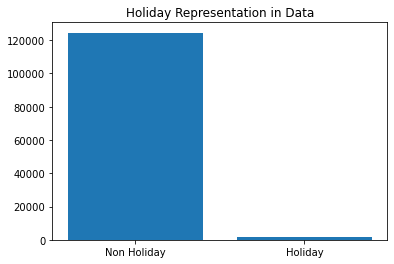

In [145]:
# __SOLUTION__
holiday_count = stocks_2017.is_holiday.value_counts()
holiday_map = lambda x: "Holiday" if x == 1 else "Non Holiday"
plt.bar([holiday_map(x) for x in holiday_count.index], holiday_count.values)
plt.title('Holiday Representation in Data');

### What holidays are found in this dataset?

In [ ]:
# Your work here!

In [122]:
# __SOLUTION__
found_holidays = stocks_2017[stocks_2017.is_holiday == 1].date.unique()
print('=====================')
for holiday in us_holidays:
    if pd.to_datetime(holiday['date']) in found_holidays:
        print(holiday['date'])
        print(holiday['name'])
        print('=====================')

2017-01-20
Inauguration Day
2017-10-09
Columbus Day
2017-11-10
Veterans Day


### Calculate the price change from opening to close

In [128]:
# __SOLUTION__
stocks_2017['price_change'] = stocks_2017.close - stocks_2017.open

### Plot the top ten prices increases and decreases via subplots

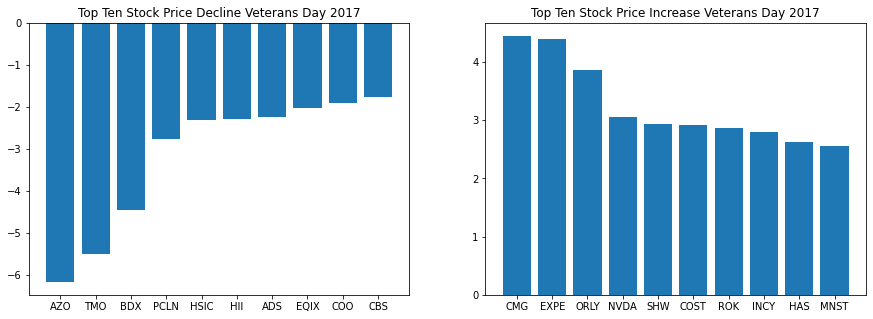

In [141]:
# __SOLUTION__
veterans_day_top_ten_decline = stocks_2017[stocks_2017.date=='2017-11-10']\
    .sort_values(by='price_change')\
    .head(10)

fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].bar(veterans_day_top_ten_decline.name, 
        veterans_day_top_ten_decline.price_change)

axes[0].set_title('Top Ten Stock Price Decline Veterans Day 2017');

veterans_day_top_ten_increase = stocks_2017[stocks_2017.date=='2017-11-10']\
    .sort_values(by='price_change', ascending=False)\
    .head(10)

axes[1].bar(veterans_day_top_ten_increase.name, 
        veterans_day_top_ten_increase.price_change)

axes[1].set_title('Top Ten Stock Price Increase Veterans Day 2017');